# RiceLeaf disease detection

#### Introduction

> **Problem and brief solution**

The impact of rice plant disease had led to a 37% annual drop in rice production. It may happen basically due to the lack of knowledge in identifying and controlling rice plant diseases. Farmers may use advancemennts in technology to diagnose rice disease, which would be a highly effective solution to these problems. Many studies are new being undertaken on the use of Deep learning technologies to diagnose such disorders. Several studies employes deep learning concepts and approaches, while others built their own techniques to  handle this issue.

According to author's best of knowledge, they have identifies various rice leaf disease, among those diseases some already widespread in some countries. But some of those diseases are unique to Sri Lanka "Pecky rice", "Grain spotting", "Leaf scald", “Root-knot”, “Narrow Brown Leaf spot”, “Bacterial blight”, “False smut”, “Sheath rot”, “Bacterial leaf streak”, “Rice blast”, “Rice sheath blight” are some common types of rice plant diseases.


 In order to identify rice plant disease by an application itself, Convulutional Neural Network (CNN) can be used. Many of researchers have used CNNs for plant disease identification because of their accuracy in image identification and classfication.

According to the litreature review which was conducted by the authors, they were able to identify some common and popular CNN models which have been used to identify rice plant disease which are known as VGG 16, InceptionV3, MobileNet, and ResNet 50.


**Steps to taken:**
  1. Data Collection
  2. EDA
  3. Data Preprocessing
  4. Model Building
  5. Evaluation
  6. Save best model for prediction


#### Dataset source


Dataset link: https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1001-RiceLeaf.zip

####Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from PIL import Image

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras import optimizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping


# Pre-trained Model
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications import EfficientNetB7


#### Basic checks

Import dataset

In [3]:
os.listdir("/content/drive/MyDrive/Internship/RiceLeaf disease detection")

['Leaf smut', 'Bacterial leaf blight', 'Brown spot']

In [4]:
# define folder path
folder_path = '/content/drive/MyDrive/Internship/RiceLeaf disease detection'

# create a function to load all the images
def load_images_from_folder(folder_path, class_name,target_size=(224,224)):
    images = []
    class_path = os.path.join(folder_path, class_name)
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        img = Image.open(image_path).resize(target_size)
        images.append((np.array(img), class_name))
    return images

# save images according to category
images_dir1 = load_images_from_folder(folder_path, 'Bacterial leaf blight')
images_dir2 = load_images_from_folder(folder_path, 'Brown spot')
images_dir3 = load_images_from_folder(folder_path, 'Leaf smut')

In [5]:
len(images_dir1), len(images_dir2), len(images_dir3)

(40, 40, 39)

check first 5 images

In [6]:
no_of_samples = 5

dir1_set = images_dir1[:no_of_samples]
dir2_set = images_dir2[:no_of_samples]
dir3_set = images_dir3[:no_of_samples]

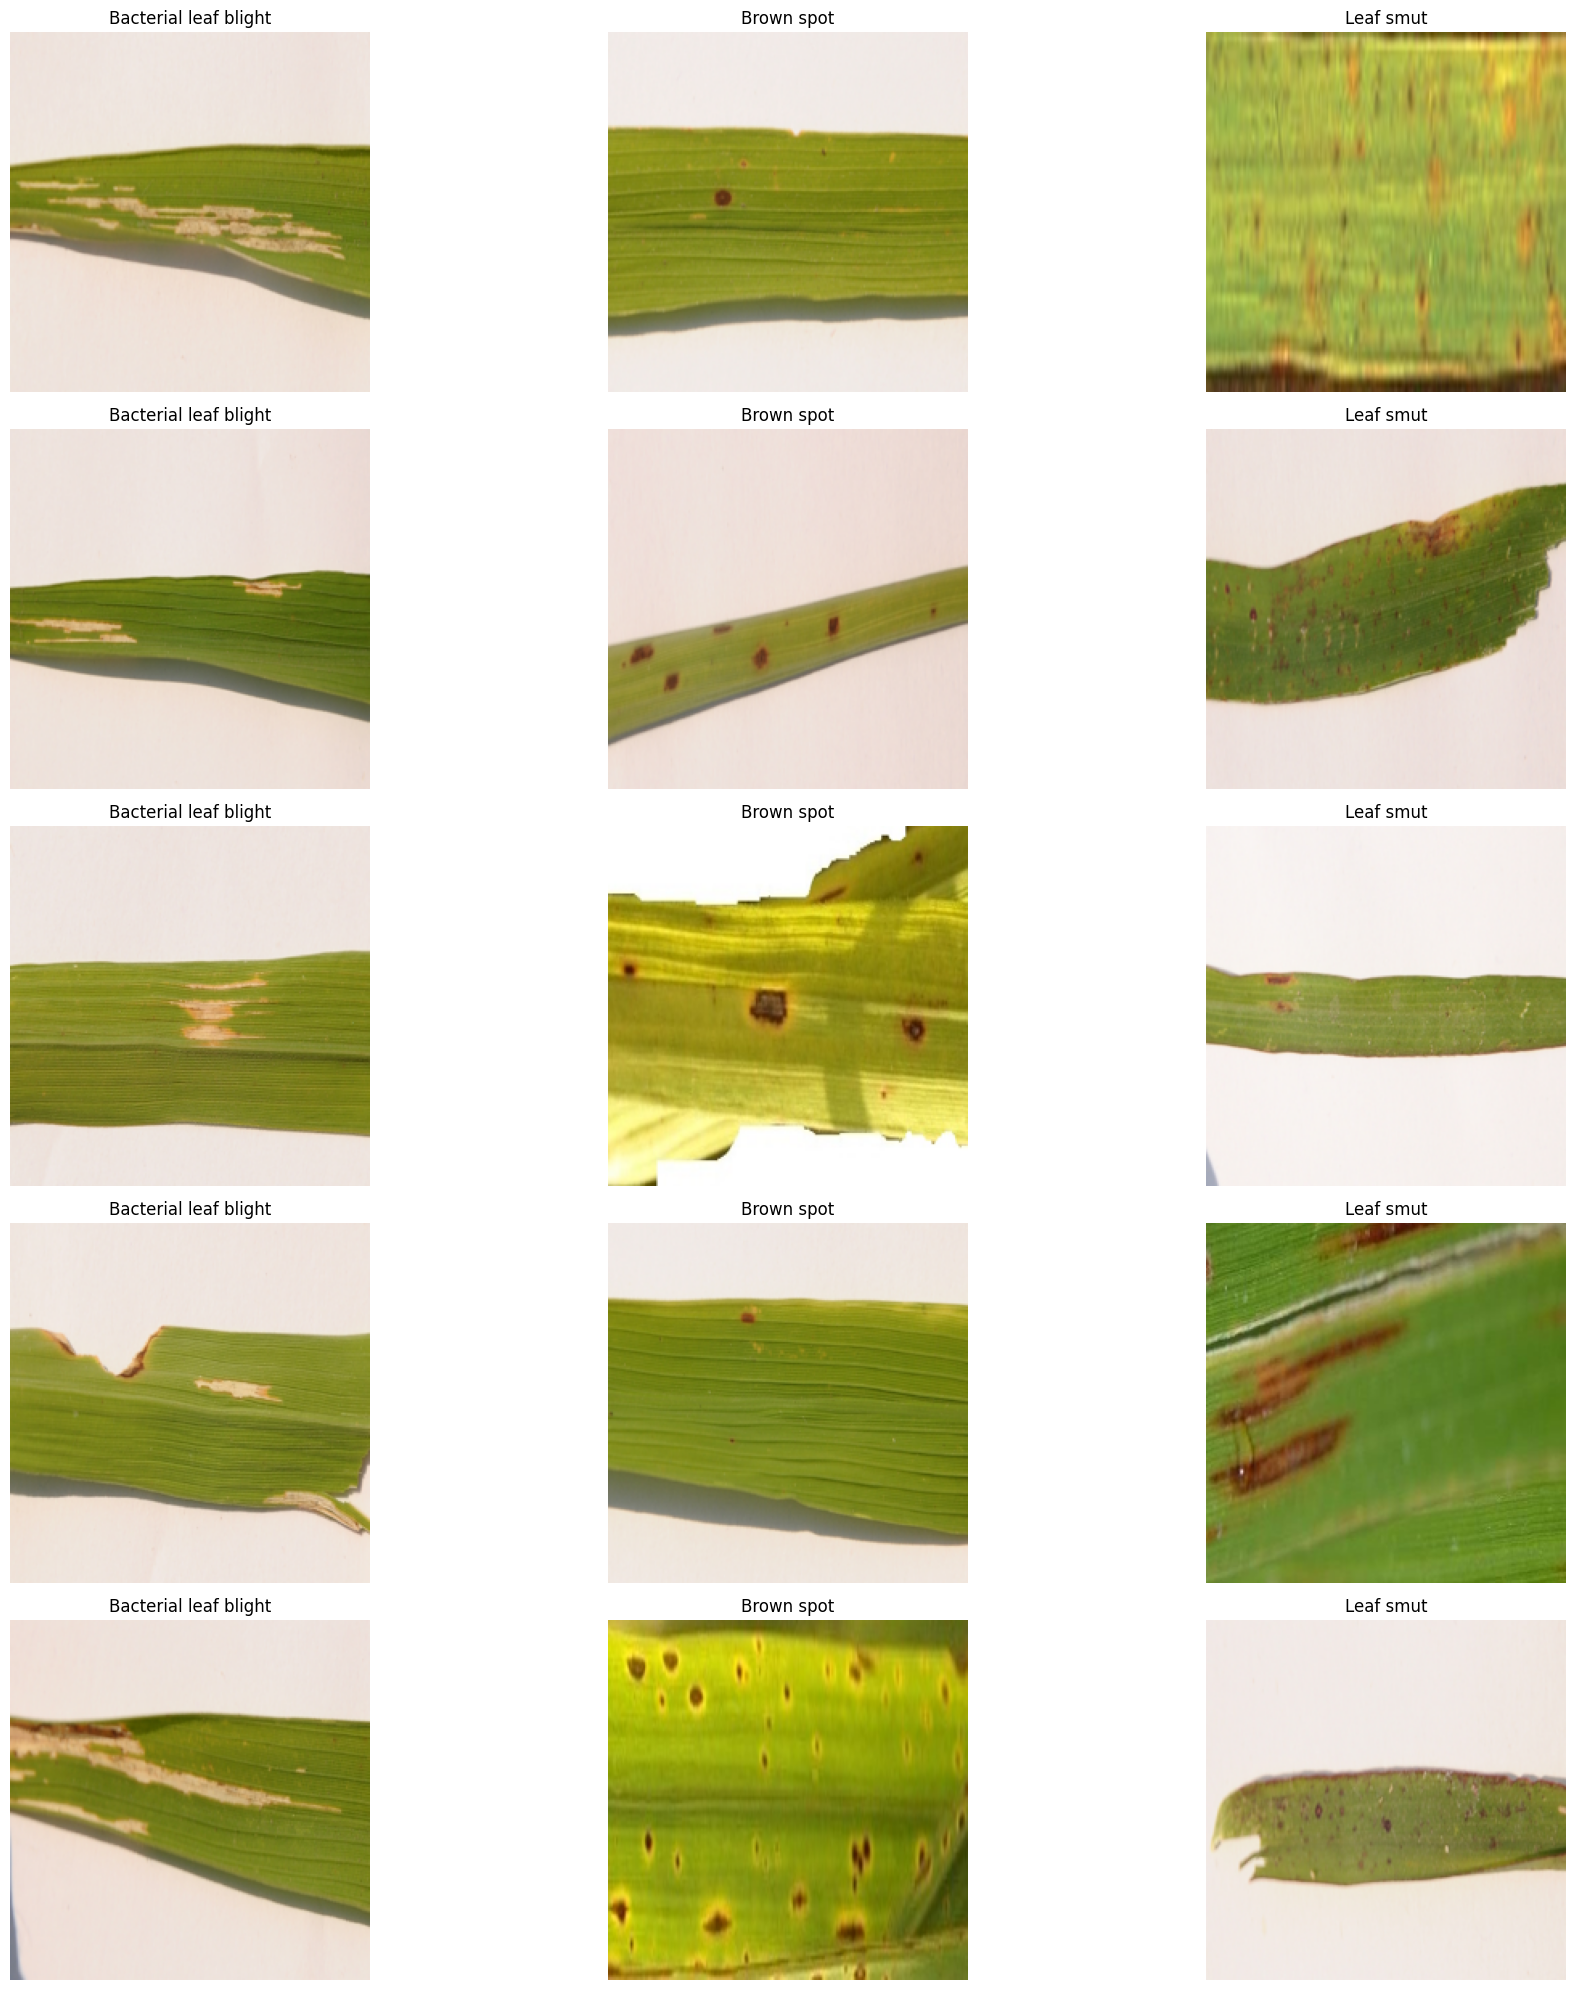

In [7]:
fig, axes = plt.subplots(nrows = no_of_samples, ncols = 3, figsize=(20,20))

for i in range(no_of_samples):
    axes[i,0].imshow(dir1_set[i][0])
    axes[i,0].set_title('Bacterial leaf blight')
    axes[i,0].axis('off')

    axes[i,1].imshow(dir2_set[i][0])
    axes[i,1].set_title('Brown spot')
    axes[i,1].axis('off')

    axes[i,2].imshow(dir3_set[i][0])
    axes[i,2].set_title('Leaf smut')
    axes[i,2].axis('off')

plt.tight_layout()
plt.show()

### Data Preprocessing

> Separation of labels and images

In [8]:
x_image=[]
y_label=[]

for img, label in images_dir1:
  x_image.append(img)
  y_label.append(label)

for img, label in images_dir2:
  x_image.append(img)
  y_label.append(label)

for img, label in images_dir3:
  x_image.append(img)
  y_label.append(label)

X and y store image and respective labels belong to it disease.

> Converting image to numpy array

In [9]:
x_image = np.array(x_image)
y_label = np.array(y_label)

In [10]:
print(x_image.dtype)
print(y_label.dtype)

uint8
<U21


> Normalizing images

In any neural netwrok normalizing the input data in common and dividing the pixel value by 255 is a way to perform this normalization for image data.

In [11]:
x_image.shape

(119, 224, 224, 3)

In [12]:
x_image = x_image/255

In [13]:
x_image

array([[[[0.93333333, 0.89019608, 0.8627451 ],
         [0.93333333, 0.88627451, 0.8627451 ],
         [0.93333333, 0.89019608, 0.8627451 ],
         ...,
         [0.93333333, 0.89803922, 0.87058824],
         [0.93333333, 0.89803922, 0.87058824],
         [0.92941176, 0.88235294, 0.85490196]],

        [[0.92941176, 0.89019608, 0.85882353],
         [0.92941176, 0.88627451, 0.8627451 ],
         [0.93333333, 0.89019608, 0.8627451 ],
         ...,
         [0.9372549 , 0.89411765, 0.87058824],
         [0.93333333, 0.89411765, 0.87058824],
         [0.93333333, 0.88627451, 0.85882353]],

        [[0.93333333, 0.89019608, 0.85882353],
         [0.92941176, 0.88627451, 0.8627451 ],
         [0.93333333, 0.89019608, 0.85882353],
         ...,
         [0.93333333, 0.89411765, 0.87058824],
         [0.9372549 , 0.89019608, 0.86666667],
         [0.9372549 , 0.88627451, 0.85882353]],

        ...,

        [[0.93333333, 0.89019608, 0.86666667],
         [0.9372549 , 0.89019608, 0.85490196]

In [14]:
# x_image = x_image.astype("int")
# y_label = y_label.astype("int")

> Train Test Split


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_image, y_label, test_size=0.2, stratify=y_label, random_state=42)

In [16]:
print(x_train.shape)
print(y_train.shape)

print("--------------")

print(x_test.shape)
print(y_test.shape)

(95, 224, 224, 3)
(95,)
--------------
(24, 224, 224, 3)
(24,)


> change datatypes

In [17]:
x_train.dtype, x_test.dtype

(dtype('float64'), dtype('float64'))

> label encoding

In [18]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels in y_train and y_test to integers
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


# Convert integer labels to one-hot encoded format
y_train = to_categorical(y_train_encoded, num_classes=3)
y_test = to_categorical(y_test_encoded, num_classes=3)

In [19]:
print(y_train.dtype)
print(y_test.dtype)

print("-----------------")

print(y_train_encoded.dtype)
print(y_test_encoded.dtype)


float32
float32
-----------------
int64
int64


In [20]:
y_train_encoded , y_test_encoded

(array([0, 0, 2, 2, 2, 2, 1, 0, 1, 1, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 1, 0,
        0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1, 2, 2, 2,
        1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 2, 1, 0,
        0, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1,
        2, 1, 1, 2, 1, 0, 1]),
 array([2, 1, 2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 0, 2, 1, 2, 0, 0, 2, 2, 1, 0,
        0, 1]))

In [21]:
y_train, y_test

(array([[1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0

## Model Building

> Modeling

In [22]:

model = Sequential()

model.add(Conv2D(filters=16, activation="relu", padding="same", kernel_size=3, input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, activation="relu", padding="same", kernel_size=3))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, activation="relu", padding="same", kernel_size=3))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, activation="relu", padding="same", kernel_size=3))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(len(label_encoder.classes_), activation="softmax"))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

>Compile the model

In [23]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

> Early stopping and model checkpoint


Early stopping serves the purpose of interrupting the training process when a certain metric stops improving over a period of time.

Model checkpoint will ensure that only the best weights get save.

In [ ]:
# early_stopping = EarlyStopping(monitor= "val_accuracy", patience=5, mode="max", restore_best_weights= True)

# checkpoint = ModelCheckpoint("best_model.h5", monitor="val_accuracy", save_best_only= True )

> Fit and train the model

In [24]:
history = model.fit(x_train, y_train_encoded, epochs=20, batch_size=32, shuffle=False, validation_data=(x_test, y_test_encoded))

Epoch 1/20
3/3 [==============================] - 14s 1s/step - loss: 1.9118 - accuracy: 0.3474 - val_loss: 1.1318 - val_accuracy: 0.3333
Epoch 2/20
3/3 [==============================] - 0s 86ms/step - loss: 1.1356 - accuracy: 0.3263 - val_loss: 1.0995 - val_accuracy: 0.3333
Epoch 3/20
3/3 [==============================] - 0s 60ms/step - loss: 1.0979 - accuracy: 0.3789 - val_loss: 1.0955 - val_accuracy: 0.3333
Epoch 4/20
3/3 [==============================] - 0s 53ms/step - loss: 1.0882 - accuracy: 0.4000 - val_loss: 1.0906 - val_accuracy: 0.3333
Epoch 5/20
3/3 [==============================] - 0s 53ms/step - loss: 1.0906 - accuracy: 0.3789 - val_loss: 1.0796 - val_accuracy: 0.3333
Epoch 6/20
3/3 [==============================] - 0s 51ms/step - loss: 1.0775 - accuracy: 0.3684 - val_loss: 1.0523 - val_accuracy: 0.5000
Epoch 7/20
3/3 [==============================] - 0s 51ms/step - loss: 1.0617 - accuracy: 0.4421 - val_loss: 1.0101 - val_accuracy: 0.5417
Epoch 8/20
3/3 [============

> Check accuracy

In [25]:
# testing the model
test_loss, base_model_accuracy = model.evaluate(x_test, y_test_encoded)
print(f"Test accuracy: {base_model_accuracy:.4f}")

1/1 [==============================] - 0s 35ms/step - loss: 0.5557 - accuracy: 0.7917
Test accuracy: 0.7917


> To see model output in visualization

<Figure size 640x480 with 0 Axes>

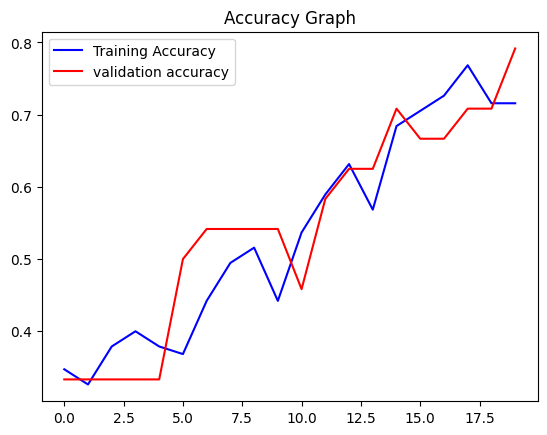

<Figure size 640x480 with 0 Axes>

In [26]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(len(acc))
plt.plot(epochs, acc, "b", label="Training Accuracy")
plt.plot(epochs, val_acc, "r", label="validation accuracy")
plt.title("Accuracy Graph")
plt.legend()
plt.figure()

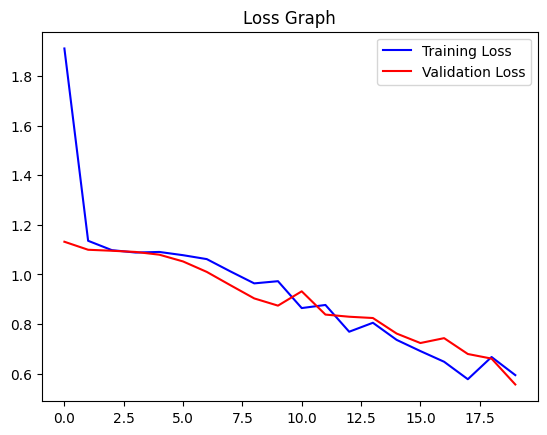

In [27]:

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

> Save Model

In [28]:
model.save("base_model.keras")

## Pre Trained Model

Now we will some use pre-trained model to get good accuracy.


### VGG-16

#### Build Model

In [29]:

# Base model
vgg_model = VGG16(input_shape=(224,224,3),
                   include_top=False,
                   weights="imagenet")

# add flatten layer
x = Flatten()(vgg_model.output)

# add dense layer
x = Dense(256, activation="relu")(x)
x = Dropout(0.4)(x)
x = Dense(128, activation="relu")(x)
prediction = Dense(3, activation="softmax")(x)

model = Model(inputs=vgg_model.input, outputs=prediction)

for layer in vgg_model.layers[:-4]:
  layer.trainable=False

# model compile
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss = "categorical_crossentropy",
              metrics=["accuracy"])


# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

#
np.random.seed(42)

# Fit the model
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=20,
                    shuffle=False,
                    validation_data=(x_test,y_test),
                    callbacks=[early_stopping, model_checkpoint]
                    )



58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/20
2/2 [==============================] - 34s 19s/step - loss: 1.3252 - accuracy: 0.3579 - val_loss: 1.0934 - val_accuracy: 0.3750
Epoch 2/20
2/2 [==============================] - 4s 4s/step - loss: 0.9273 - accuracy: 0.5263 - val_loss: 0.9348 - val_accuracy: 0.6250
Epoch 3/20
2/2 [==============================] - 1s 336ms/step - loss: 0.6788 - accuracy: 0.8211 - val_loss: 0.8441 - val_accuracy: 0.6250
Epoch 4/20
2/2 [==============================] - 1s 320ms/step - loss: 0.4834 - accuracy: 0.8632 - val_loss: 0.8934 - val_accuracy: 0.6250
Epoch 5/20
2/2 [==============================] - 1s 711ms/step - loss: 0.2840 - accuracy: 0.9579 - val_loss: 1.1256 - val_accuracy: 0.6667
Epoch 6/20
2/2 [==============================] - 3s 2s/step - loss: 0.2280 - accuracy: 0.9263 - val_loss: 1.2793 - val_accuracy: 0.7083
Epoch 7/20
2/2 [==============================] - 1s 904ms/step - loss: 0.1262 - accuracy: 0.9895 - va

#### Evaluation

In [30]:
# testing the model
test_loss, vgg_test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {vgg_test_accuracy:.4f}")

1/1 [==============================] - 0s 169ms/step - loss: 0.8022 - accuracy: 0.7917
Test accuracy: 0.7917


####Visualization Model performance

<Figure size 640x480 with 0 Axes>

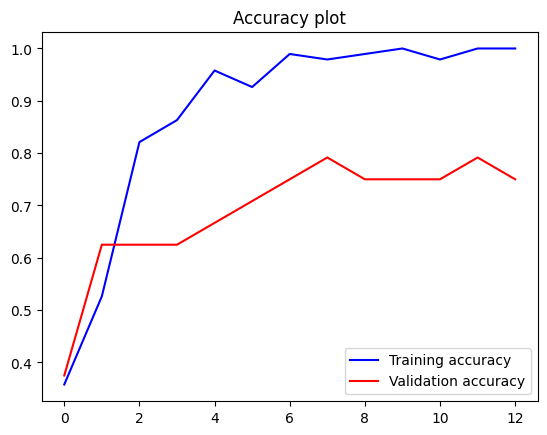

<Figure size 640x480 with 0 Axes>

In [31]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

eopchs = range(len(acc))
plt.plot(eopchs, acc, "b", label="Training accuracy")
plt.plot(eopchs, val_acc, "r", label="Validation accuracy")
plt.title("Accuracy plot")
plt.legend()
plt.figure()

#### Save the Model

In [32]:
vgg_model.save("Vgg_model.keras")

### InceptionV3

#### Modeling

In [33]:

# Base model
ince_model = InceptionV3(input_shape=(224,224,3),
                   include_top=False,
                   weights="imagenet")

# add flatten layer
x = Flatten()(ince_model.output)

# add dense layer
x = Dense(1024, activation="relu")(x)
x = Dropout(0.4)(x)
x = Dense(500, activation="relu")(x)
prediction = Dense(3, activation="softmax")(x)

model = Model(inputs=ince_model.input, outputs=prediction)

# Freeze model
for layer in ince_model.layers[:-4]:
  layer.trainable=False

# model compile
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss = "categorical_crossentropy",
              metrics=["accuracy"])


# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

#
np.random.seed(42)

# Fit the model
ince_history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=20,
                    shuffle=False,
                    validation_data=(x_test,y_test),
                    callbacks=[early_stopping, model_checkpoint]
                    )



87910968/87910968 [==============================] - 1s 0us/step
Epoch 1/20
2/2 [==============================] - 24s 14s/step - loss: 4.8211 - accuracy: 0.3158 - val_loss: 3.8354 - val_accuracy: 0.4167
Epoch 2/20
2/2 [==============================] - 6s 5s/step - loss: 1.6278 - accuracy: 0.6105 - val_loss: 2.4538 - val_accuracy: 0.4583
Epoch 3/20
2/2 [==============================] - 15s 15s/step - loss: 1.5392 - accuracy: 0.5158 - val_loss: 0.4734 - val_accuracy: 0.7917
Epoch 4/20
2/2 [==============================] - 0s 261ms/step - loss: 0.2540 - accuracy: 0.9158 - val_loss: 1.2103 - val_accuracy: 0.6250
Epoch 5/20
2/2 [==============================] - 0s 274ms/step - loss: 0.3878 - accuracy: 0.8526 - val_loss: 1.1260 - val_accuracy: 0.6250
Epoch 6/20
2/2 [==============================] - 4s 4s/step - loss: 0.2056 - accuracy: 0.9368 - val_loss: 0.6233 - val_accuracy: 0.8333
Epoch 7/20
2/2 [==============================] - 0s 187ms/step - loss: 0.1093 - accuracy: 0.9684 - val

#### Evaluation

In [34]:
# testing the model
test_loss, ince_test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {ince_test_accuracy:.4f}")

1/1 [==============================] - 0s 82ms/step - loss: 0.4734 - accuracy: 0.7917
Test accuracy: 0.7917


#### Visualize of Model performance

<Figure size 640x480 with 0 Axes>

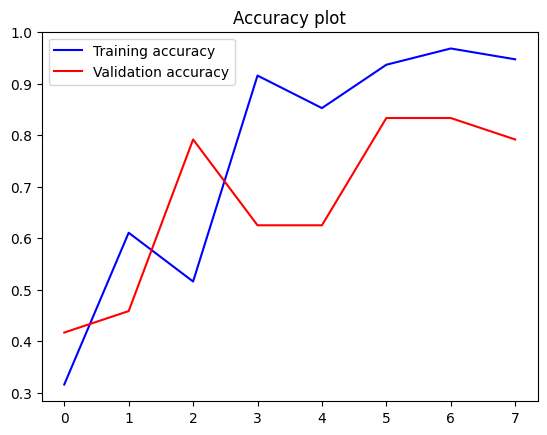

<Figure size 640x480 with 0 Axes>

In [35]:
acc = ince_history.history["accuracy"]
val_acc = ince_history.history["val_accuracy"]

eopchs = range(len(acc))
plt.plot(eopchs, acc, "b", label="Training accuracy")
plt.plot(eopchs, val_acc, "r", label="Validation accuracy")
plt.title("Accuracy plot")
plt.legend()
plt.figure()

#### Save the Model

In [36]:
ince_model.save("inceptionv3_model.keras")

### MobileNetV2

#### Modeling

In [37]:
# Load model
mnv_model = MobileNetV2(weights = "imagenet",
                        include_top = False,
                        input_shape = (224,224,3))

# add custom layers
x = Flatten()(mnv_model.output)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)
x = Dense(64, activation="relu")(x)

prediction = Dense(3, activation="softmax")(x)

# Combine model with layers
model = Model(inputs = mnv_model.input, outputs=prediction)

# Freeze the layers of the model
for layer in mnv_model.layers:
  layer.trainable=False

# Compile model
model.compile(optimizer = optimizers.Adam(learning_rate=0.0001),
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

#
np.random.seed(42)

# Fit the model
mnv_history = model.fit(x_train, y_train,
                        batch_size=32,
                        epochs=20,
                        shuffle=False,
                        validation_data=(x_test,y_test),
                        callbacks=[early_stopping, model_checkpoint]
                        )

# Load the best model
# model.load_weights('best_model.h5')


9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/20
3/3 [==============================] - 9s 2s/step - loss: 1.3137 - accuracy: 0.5053 - val_loss: 0.8740 - val_accuracy: 0.5833
Epoch 2/20
3/3 [==============================] - 0s 136ms/step - loss: 0.3870 - accuracy: 0.8632 - val_loss: 0.8142 - val_accuracy: 0.5417
Epoch 3/20
3/3 [==============================] - 1s 373ms/step - loss: 0.2972 - accuracy: 0.8842 - val_loss: 0.6778 - val_accuracy: 0.6667
Epoch 4/20
3/3 [==============================] - 1s 344ms/step - loss: 0.0766 - accuracy: 0.9789 - val_loss: 0.8031 - val_accuracy: 0.7083
Epoch 5/20
3/3 [==============================] - 0s 89ms/step - loss: 0.0423 - accuracy: 0.9789 - val_loss: 0.7176 - val_accuracy: 0.6667
Epoch 6/20
3/3 [==============================] - 0s 130ms/step - loss: 0.0278 - accuracy: 0.9895 - val_loss: 0.6245 - val_accuracy: 0.6250
Epoch 7/20
3/3 [==============================] - 0s 75ms/step - loss: 0.0102 - accuracy: 1.0000 - va

#### Evaluation

In [38]:
# testing the model
test_loss, mnv_test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {mnv_test_accuracy:.4f}")

1/1 [==============================] - 0s 75ms/step - loss: 0.5520 - accuracy: 0.7500
Test accuracy: 0.7500


#### Visualize of Model performance

<Figure size 640x480 with 0 Axes>

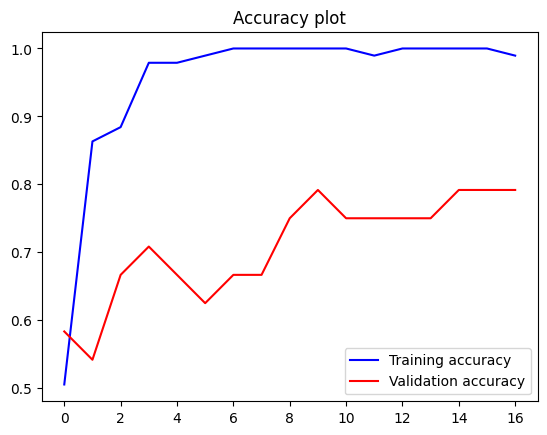

<Figure size 640x480 with 0 Axes>

In [39]:
acc = mnv_history.history["accuracy"]
val_acc = mnv_history.history["val_accuracy"]

eopchs = range(len(acc))
plt.plot(eopchs, acc, "b", label="Training accuracy")
plt.plot(eopchs, val_acc, "r", label="Validation accuracy")
plt.title("Accuracy plot")
plt.legend()
plt.figure()

#### Save the Model

In [40]:
mnv_model.save("Mobilenetv2_model.keras")

### ResNet50

#### Modeling

In [41]:
# Load model
rn_model = ResNet50(weights = "imagenet",
                        include_top = False,
                        input_shape = (224,224,3),
                    )

# add custom layers
x = Flatten()(rn_model.output)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.4)(x)
x = Dense(500, activation="relu")(x)
x = Dropout(0.3)(x)

prediction = Dense(3, activation="softmax")(x)

# Combine model with layers
model = Model(inputs = rn_model.input, outputs=prediction)

# Freeze the layers of the model
for layer in rn_model.layers[:-5]:
  layer.trainable=False

# Compile model
model.compile(optimizer = optimizers.Adam(learning_rate=0.0001),
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)


np.random.seed(42)

# Fit the model
mnv_history = model.fit(x_train, y_train,
                        batch_size=32,
                        epochs=20,
                        shuffle=False,
                        validation_data=(x_test,y_test),
                        callbacks=[early_stopping, model_checkpoint]
                        )

# Load the best model
# model.load_weights('best_model.h5')


94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/20
3/3 [==============================] - 25s 10s/step - loss: 3.8513 - accuracy: 0.3053 - val_loss: 1.3013 - val_accuracy: 0.3333
Epoch 2/20
3/3 [==============================] - 1s 609ms/step - loss: 2.5049 - accuracy: 0.3368 - val_loss: 1.2909 - val_accuracy: 0.3333
Epoch 3/20
3/3 [==============================] - 1s 564ms/step - loss: 2.0072 - accuracy: 0.4105 - val_loss: 1.1963 - val_accuracy: 0.3333
Epoch 4/20
3/3 [==============================] - 1s 516ms/step - loss: 1.6808 - accuracy: 0.3684 - val_loss: 1.1749 - val_accuracy: 0.2917
Epoch 5/20
3/3 [==============================] - 1s 481ms/step - loss: 1.7722 - accuracy: 0.3895 - val_loss: 1.1357 - val_accuracy: 0.3333
Epoch 6/20
3/3 [==============================] - 0s 178ms/step - loss: 1.7099 - accuracy: 0.4000 - val_loss: 1.1831 - val_accuracy: 0.3333
Epoch 7/20
3/3 [==============================] - 0s 179ms/step - loss: 1.5105 - accuracy: 0.505

#### Evaluation

In [42]:
# testing the model
test_loss, rn_test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {rn_test_accuracy:.4f}")

1/1 [==============================] - 0s 133ms/step - loss: 1.1357 - accuracy: 0.3333
Test accuracy: 0.3333


#### Visualize of Model performance

<Figure size 640x480 with 0 Axes>

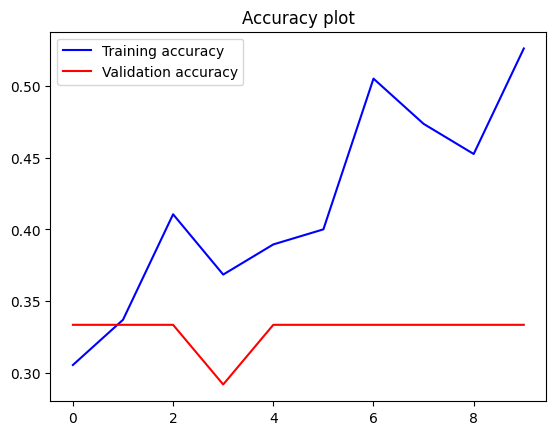

<Figure size 640x480 with 0 Axes>

In [43]:
acc = mnv_history.history["accuracy"]
val_acc = mnv_history.history["val_accuracy"]

eopchs = range(len(acc))
plt.plot(eopchs, acc, "b", label="Training accuracy")
plt.plot(eopchs, val_acc, "r", label="Validation accuracy")
plt.title("Accuracy plot")
plt.legend()
plt.figure()

#### Save the Model

In [44]:
rn_model.save("Resnet50_model.keras")

### EfficientNetB7

#### Modeling

In [45]:
# Load model
enb_model = EfficientNetB7(weights = "imagenet",
                        include_top = False,
                        input_shape = (224,224,3))

# add custom layers
x = Flatten()(enb_model.output)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.3)(x)
x = Dense(500, activation="relu")(x)
prediction = Dense(3, activation="softmax")(x)

# Combine model with layers
model = Model(inputs = enb_model.input, outputs=prediction)

# Freeze the layers of the model
for layer in enb_model.layers:
  layer.trainable=False

# Compile model
model.compile(optimizer = optimizers.Adam(learning_rate=0.0001),
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)


np.random.seed(42)

# Fit the model
enb_history = model.fit(x_train, y_train,
                        batch_size=32,
                        epochs=20,
                        shuffle=False,
                        validation_data=(x_test,y_test),
                        callbacks=[early_stopping, model_checkpoint]
                        )


# Load the best model
# model.load_weights('best_model.h5')

258076736/258076736 [==============================] - 1s 0us/step
Epoch 1/20
3/3 [==============================] - 57s 17s/step - loss: 17.4411 - accuracy: 0.2526 - val_loss: 8.4840 - val_accuracy: 0.3333
Epoch 2/20
3/3 [==============================] - 2s 557ms/step - loss: 6.2632 - accuracy: 0.4316 - val_loss: 8.7161 - val_accuracy: 0.3333
Epoch 3/20
3/3 [==============================] - 3s 1s/step - loss: 8.2052 - accuracy: 0.3053 - val_loss: 4.4572 - val_accuracy: 0.3333
Epoch 4/20
3/3 [==============================] - 3s 1s/step - loss: 5.5685 - accuracy: 0.2421 - val_loss: 3.7913 - val_accuracy: 0.3333
Epoch 5/20
3/3 [==============================] - 3s 1s/step - loss: 3.5733 - accuracy: 0.4105 - val_loss: 2.4163 - val_accuracy: 0.3333
Epoch 6/20
3/3 [==============================] - 3s 1s/step - loss: 4.0163 - accuracy: 0.2842 - val_loss: 2.2402 - val_accuracy: 0.3333
Epoch 7/20
3/3 [==============================] - 3s 1s/step - loss: 3.0843 - accuracy: 0.4000 - val_loss

#### Evaluation

In [46]:
# testing the model
test_loss, enb_test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {enb_test_accuracy:.4f}")

1/1 [==============================] - 0s 344ms/step - loss: 1.3891 - accuracy: 0.3333
Test accuracy: 0.3333


#### Visualize of Model performance

<Figure size 640x480 with 0 Axes>

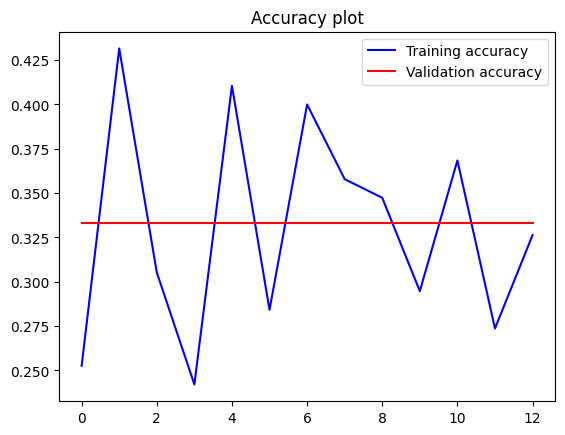

<Figure size 640x480 with 0 Axes>

In [47]:
acc = enb_history.history["accuracy"]
val_acc = enb_history.history["val_accuracy"]

eopchs = range(len(acc))
plt.plot(eopchs, acc, "b", label="Training accuracy")
plt.plot(eopchs, val_acc, "r", label="Validation accuracy")
plt.title("Accuracy plot")
plt.legend()
plt.figure()

#### Save the Model

In [48]:
enb_model.save("Efficientb7_model.keras")

## Best Model

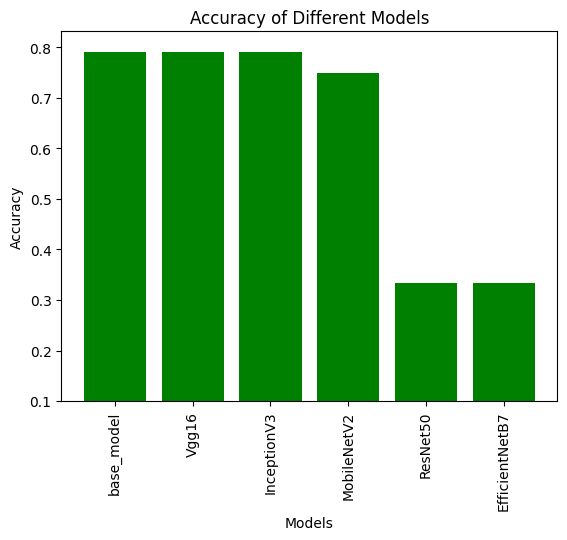

In [49]:
Models = ["base_model", "Vgg16", "InceptionV3", "MobileNetV2", "ResNet50", "EfficientNetB7" ]

accuracies = [base_model_accuracy, vgg_test_accuracy, ince_test_accuracy, mnv_test_accuracy, rn_test_accuracy, enb_test_accuracy]

plt.bar(Models, accuracies, color="green")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Models")
plt.xticks(rotation=90)
plt.ylim(0.1)
plt.show()


In [ ]:
# Final model
ince_model.save("Final_model.keras")

From above plot we can say that MobileNetV2 is best prediction model for Rice leaf disease.